In [1]:
%matplotlib notebook
import numpy as np
import matplotlib.pyplot as plt
import h5py

In [2]:
fpath = '/Users/lili/Research/Experiment/SRX_Aakriti/2015_11_13_22_26_pyxrf.h5'

In [3]:
with h5py.File(fpath, 'r') as f:
    d = f['xrfmap/detsum/counts'][:]

In [4]:
# 3D fluorescence data
# shape is [number of row, number of col, number of points in spectrum]
d.shape

(10, 10, 4096)

In [5]:
# x axis as energy in kev
x = np.arange(4096)
x = 0.01*x             # approximately transfer channel number to kev

# choose two areas  
d1 = d[0:5,0:5,:]    # choose x position from 0 to 5, choose y from 0 to 5, first square
d2 = d[5:10,5:10,:]  # choose x position from 5 to 10, choose y from 5 to 10, last square  

# sum spectrum in those two areas
y1 = np.sum(d1, axis=(0,1))   # sum along axis 0 and 1
y2 = np.sum(d2, axis=(0,1))

<IPython.core.display.Javascript object>


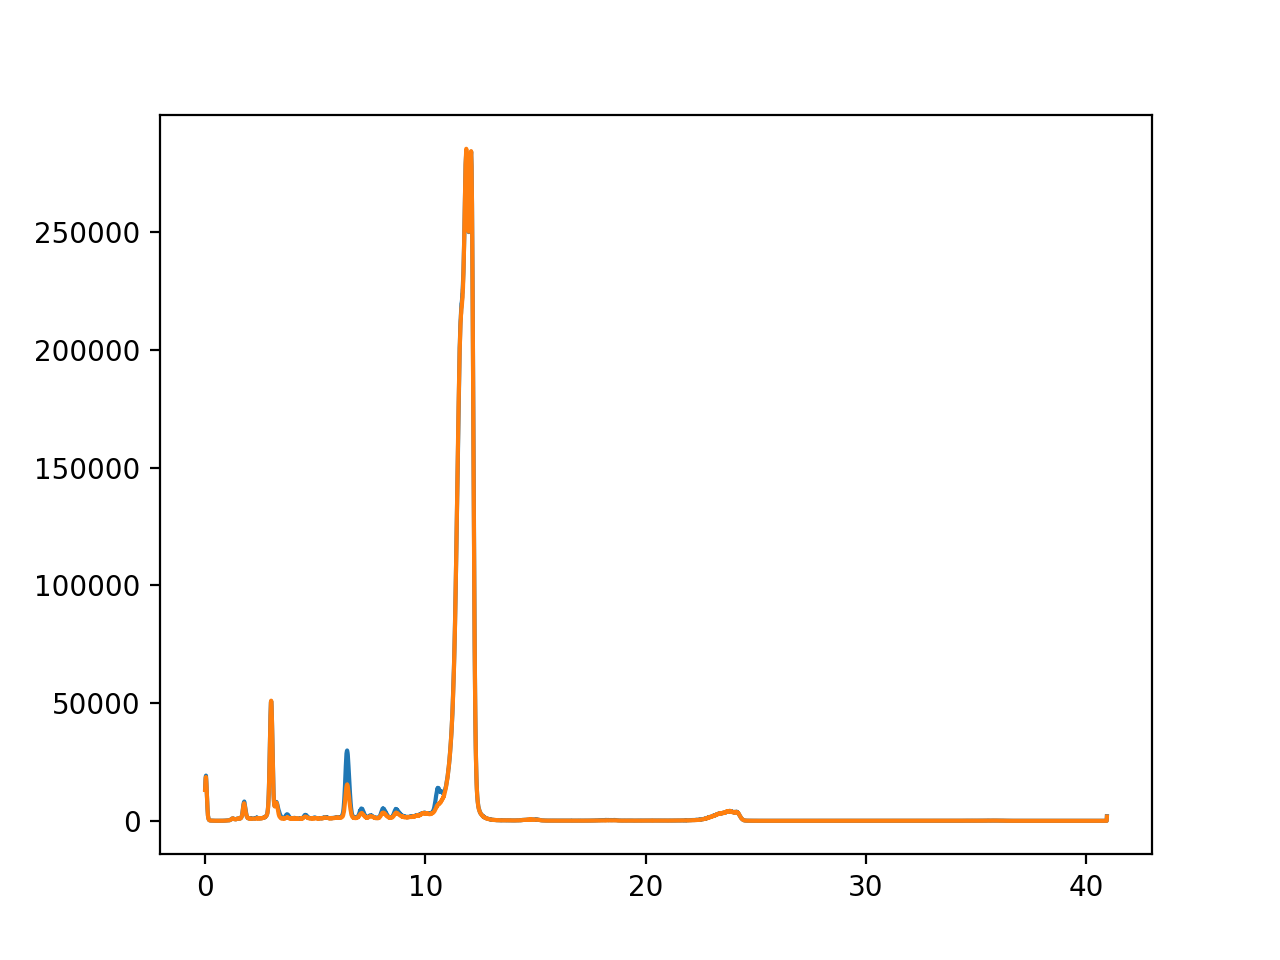

In [6]:
fig, ax = plt.subplots()
ax.plot(x, y1)
ax.plot(x, y2)

<IPython.core.display.Javascript object>


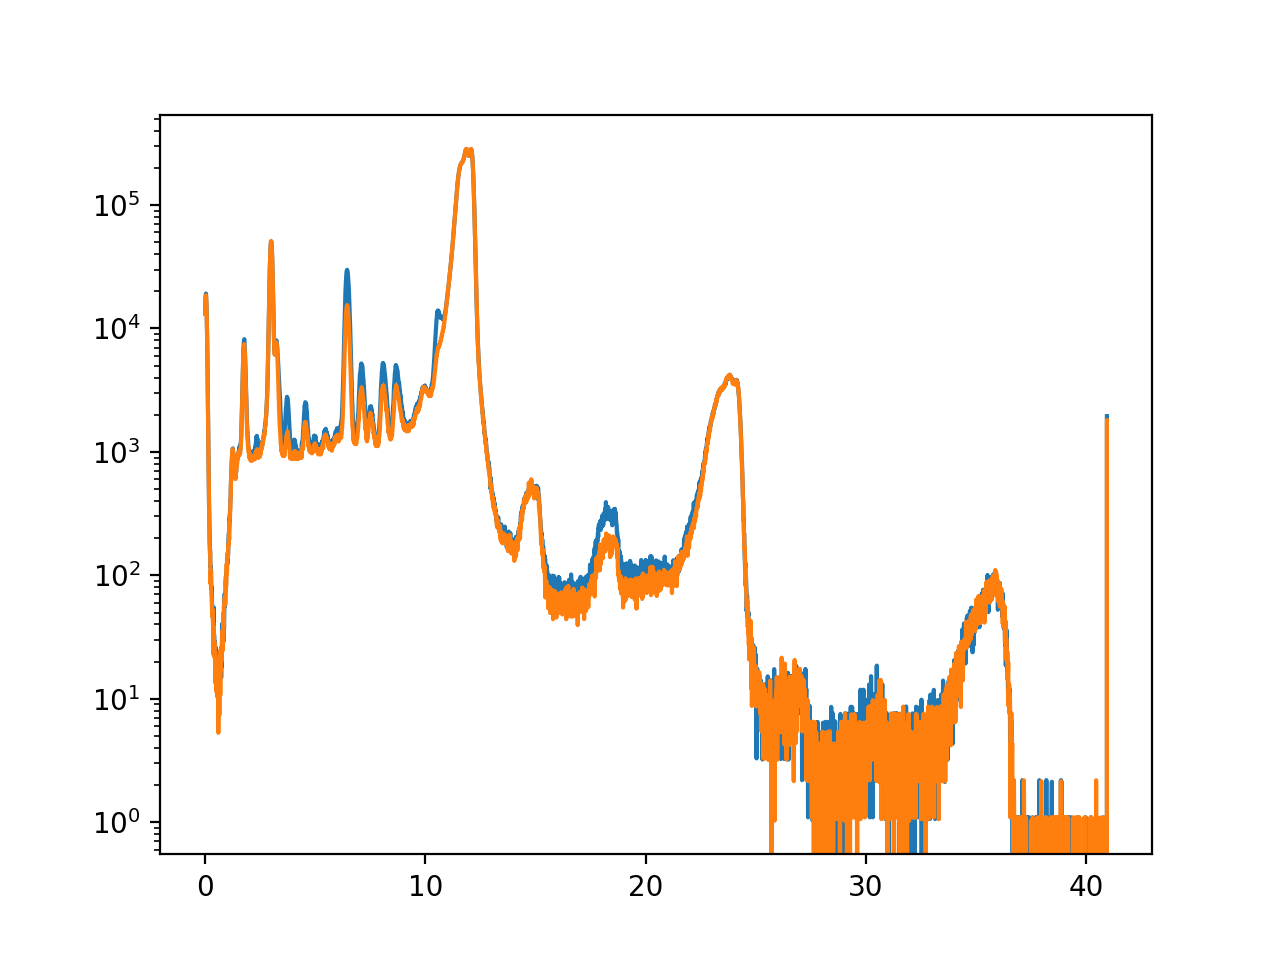

In [7]:
# log plot
fig, ax = plt.subplots()
ax.semilogy(x, y1)
ax.semilogy(x, y2)

<IPython.core.display.Javascript object>


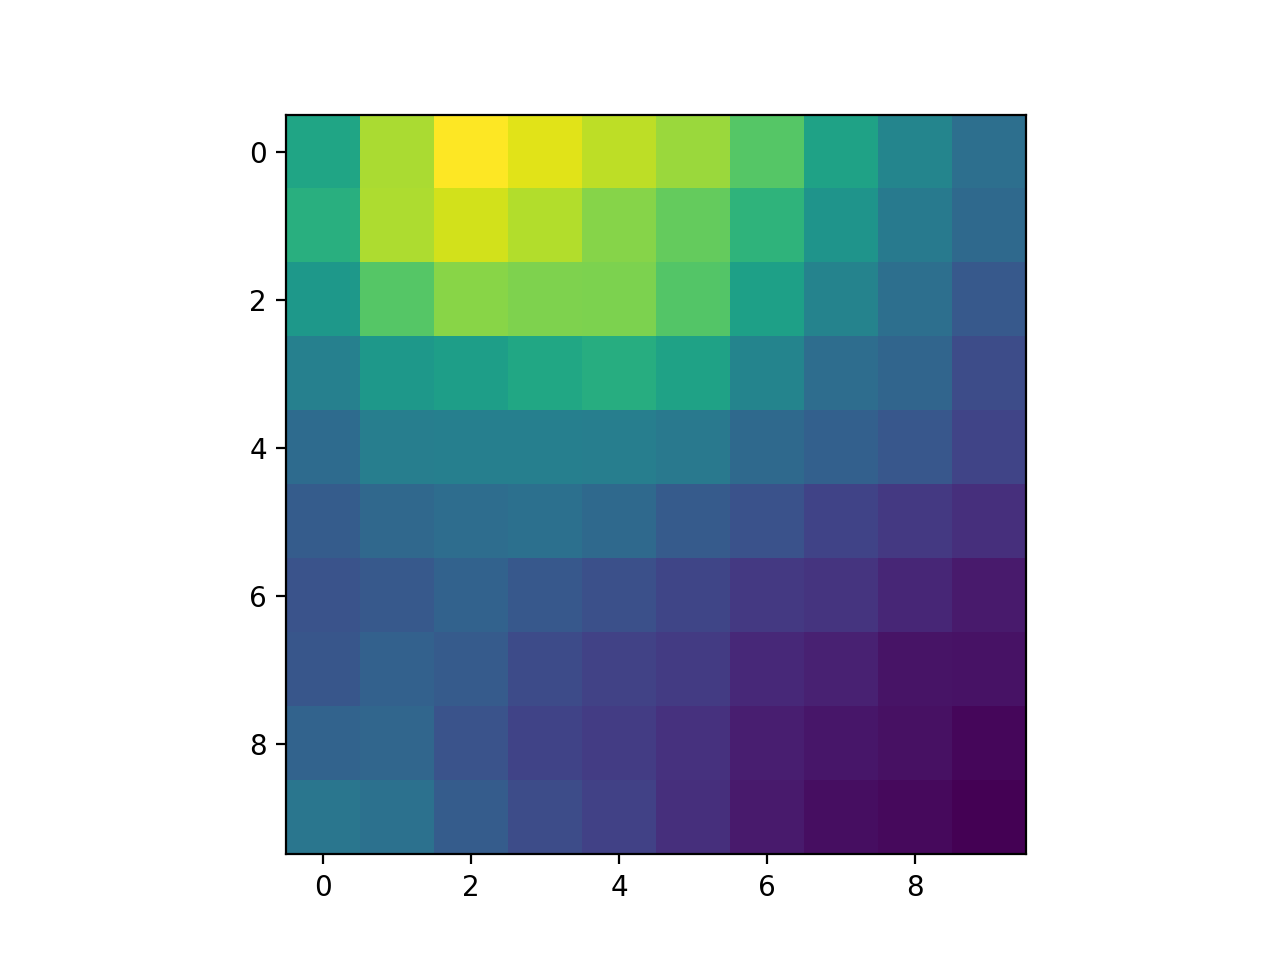

In [10]:
# choose a roi to plot, like Fe
d_fe = d[:, :, 610:660]
fe = np.sum(d_fe, axis=(2))   # sum along axis 2
fig, ax = plt.subplots()
ax.imshow(fe)